<a href="https://colab.research.google.com/github/PiaMoran22/PCOMP-EXAMEN/blob/main/examen%20pcomp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EL MOSTRADOR : SCRAPPING Y WORDCLOUD

In [ ]:
# 1 - IMPORTAR LIBRERIAS

#para procesamiento de datos
import pandas as pd

#para visualizar librerías
import matplotlib.pyplot as plt

#para conectarse a las url de las noticias en la web
import requests

#para hacer scraping desde sitios web permote seleccinar los tags y capturar los elementos que contiene
from bs4 import BeautifulSoup

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import unicodedata


In [ ]:
# SCRAPPING: REQUEST (VER SI LA PAGINA DEJA HACER SCRAPPING, SI RESPONDE CON EL NUMERO 200 ES Q SI SE PUEDE)

req1 = requests.get('https://www.elmostrador.cl/noticias/pais/2025/06/19/guerras-las-terminan-pagando-inocentes-boric-condena-sin-matices-ataques-entre-israel-e-iran/')
larespuesta = req1.status_code

larespuesta


200

In [ ]:
# SCRAPPING: VER HTML

soup1 = BeautifulSoup(req1.content.decode("utf-8"),  "html.parser")

soup1


<!DOCTYPE html>

<html class="u-disable-effects scheme-desktop" lang="es">
<head>
<meta charset="utf-8"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="" name="author"/>
<link href="/favicon.png" rel="shortcut icon" type="image/x-icon"/>
<link href="/_templates/desktop/includes/css/main.min.css?v=1.0.0.84" rel="stylesheet"/>
<meta content="" name="theme-color"/>
<!-- VARIABLES PARA METAS -->
<!-- /VARIABLES PARA METAS -->
<title>Guerras “las terminan pagando inocentes”: Boric condena “sin matices” ataques entre Israel e Irán</title>
<meta content="Franja de Gaza,Gabriel Boric,Israel,Palestina" name="keywords"/>
<meta content="La comunidad judía en Chile había acusado una falta de reacción frente a un bombardeo iraní que afectó a un hospital en Israel. El Mandatario respondió que Chile rechaza todos los ataques, y reafirmó su compromiso con el derecho internacional. El conflicto ya deja más de

In [ ]:
# SCRAPPING: OBTENER TÍTULO

art_tit = soup1.find("h1").text.strip()

print( art_tit )


Guerras “las terminan pagando inocentes”: Boric condena “sin matices” ataques entre Israel e Irán


In [ ]:
# SCRAPPING: OBTENER BAJADA

art_bajada = soup1.find("p", class_='d-the-single__excerpt | u-fw-600').text.strip()

print( art_bajada  )


La comunidad judía en Chile había acusado una falta de reacción frente a un bombardeo iraní que afectó a un hospital en Israel. El Mandatario respondió que Chile rechaza todos los ataques, y reafirmó su compromiso con el derecho internacional. El conflicto ya deja más de 200 muertos.


In [ ]:
# SCRAPPING: OBTENER CONTENIDO

## - - - - - - - - - - - -
## OBTENER CONTENIDO
## - - - - - - - - - - - -

## find_all selecciona todos los elementos de un tipo, en este caso article
art_contenido = soup1.find_all("div", class_="d-the-single-wrapper__text" )
#art_contenido = soup1.find_all("div" )

# Mostrar contenido
print( len( art_contenido ) )
contenido_oficial = art_contenido[0].text.strip()
contenido_oficial


1


'El Presidente Gabriel Boric se pronunció este jueves sobre la creciente escalada del conflicto entre Irán e Israel, condenando los ataques de ambos países y recalcando que “las guerras siempre las terminan pagando los inocentes”.\nA través de un mensaje publicado en la red social X, el Mandatario expresó que “Israel ataca a Irán, Irán ataca a Israel. Mueren civiles en Irán, mueren civiles en Israel. Y siguen muriendo civiles en Gaza”. En esa línea, afirmó que Chile condena “sin matices” los ataques en curso y reiteró el compromiso del país con la defensa del derecho internacional y los derechos humanos “en todos los contextos y en todas las instancias”.\n\nIsrael ataca a Irán, Irán ataca a Israel. Mueren civiles en Irán, mueren civiles en Israel. Y siguen muriendo civiles en Gaza. Hoy, un misil de Irán generó daños en un Hospital en Israel y más de 40 heridos. Condenamos sin matices estos ataques. Las guerras siempre las terminan…\n— Gabriel Boric Font (@GabrielBoric) June 19, 2025\n\

In [ ]:
## - - - - - - - - - - - -
## SEPARAR PALABRAS TITULO
## - - - - - - - - - - - -

# lower poner palabras en bajas
art_tit_low   = art_tit.strip().lower()

# Se separan todas las palabras y guardar en una lista
art_tit_split_elmostrador = art_tit_low.split() # Split corta
art_tit_split_elmostrador

['guerras',
 '“las',
 'terminan',
 'pagando',
 'inocentes”:',
 'boric',
 'condena',
 '“sin',
 'matices”',
 'ataques',
 'entre',
 'israel',
 'e',
 'irán']

In [ ]:
## - - - - - - - - - - - -
## SEPARAR PALABRAS BAJADA
## - - - - - - - - - - - -

# lower poner palabras en bajas
art_bajada_low   = art_bajada.strip().lower()

# Se separan todas las palabras y guardar en una lista
art_bajada_split_elmostrador = art_bajada_low.split() # Split corta
art_bajada_split_elmostrador

['la',
 'comunidad',
 'judía',
 'en',
 'chile',
 'había',
 'acusado',
 'una',
 'falta',
 'de',
 'reacción',
 'frente',
 'a',
 'un',
 'bombardeo',
 'iraní',
 'que',
 'afectó',
 'a',
 'un',
 'hospital',
 'en',
 'israel.',
 'el',
 'mandatario',
 'respondió',
 'que',
 'chile',
 'rechaza',
 'todos',
 'los',
 'ataques,',
 'y',
 'reafirmó',
 'su',
 'compromiso',
 'con',
 'el',
 'derecho',
 'internacional.',
 'el',
 'conflicto',
 'ya',
 'deja',
 'más',
 'de',
 '200',
 'muertos.']

In [ ]:
## - - - - - - - - - - - -
## SEPARAR PALABRAS CONTENIDO
## - - - - - - - - - - - -

# lower poner palabras en bajas
contenido_low   = contenido_oficial.strip().lower()

# Se separan todas las palabras y guardar en una lista
contenido_oficial_split_elmostrador = contenido_low.split() # Split corta
contenido_oficial_split_elmostrador


['el',
 'presidente',
 'gabriel',
 'boric',
 'se',
 'pronunció',
 'este',
 'jueves',
 'sobre',
 'la',
 'creciente',
 'escalada',
 'del',
 'conflicto',
 'entre',
 'irán',
 'e',
 'israel,',
 'condenando',
 'los',
 'ataques',
 'de',
 'ambos',
 'países',
 'y',
 'recalcando',
 'que',
 '“las',
 'guerras',
 'siempre',
 'las',
 'terminan',
 'pagando',
 'los',
 'inocentes”.',
 'a',
 'través',
 'de',
 'un',
 'mensaje',
 'publicado',
 'en',
 'la',
 'red',
 'social',
 'x,',
 'el',
 'mandatario',
 'expresó',
 'que',
 '“israel',
 'ataca',
 'a',
 'irán,',
 'irán',
 'ataca',
 'a',
 'israel.',
 'mueren',
 'civiles',
 'en',
 'irán,',
 'mueren',
 'civiles',
 'en',
 'israel.',
 'y',
 'siguen',
 'muriendo',
 'civiles',
 'en',
 'gaza”.',
 'en',
 'esa',
 'línea,',
 'afirmó',
 'que',
 'chile',
 'condena',
 '“sin',
 'matices”',
 'los',
 'ataques',
 'en',
 'curso',
 'y',
 'reiteró',
 'el',
 'compromiso',
 'del',
 'país',
 'con',
 'la',
 'defensa',
 'del',
 'derecho',
 'internacional',
 'y',
 'los',
 'derechos',

In [ ]:
# EN ESTAS VARIABLES QUEDARON GUARDADAS LAS LISTAS QUE CONTIENEN LAS PALABRAS DE CADA PARTE DE LA NOTICIA DE EL MOSTRADOR (SIN LIMPIEZA SIN NADA)

# TITULO: art_tit_split_elmostrador
# BAJADA: art_bajada_split_elmostrador
# CUERPO: contenido_oficial_split_elmostrador

In [ ]:
# A PARTIR DE ACA ES PA SACAR LAS STOPWORDS
mis_stopw = pd.read_csv('/content/stop_words_new.csv')

In [ ]:
lista_stopwords = mis_stopw['palabras'].astype(str).str.lower().tolist()
lista_stopwords

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '_',
 'a',
 'actualmente',
 'acuerdo',
 'adelante',
 'ademas',
 'además',
 'adrede',
 'afirmó',
 'agregó',
 'ahi',
 'ahora',
 'ahí',
 'al',
 'algo',
 'alguna',
 'algunas',
 'alguno',
 'algunos',
 'algún',
 'alli',
 'allí',
 'alrededor',
 'ambos',
 'ampleamos',
 'antano',
 'antaño',
 'ante',
 'anterior',
 'antes',
 'apenas',
 'aproximadamente',
 'aquel',
 'aquella',
 'aquellas',
 'aquello',
 'aquellos',
 'aqui',
 'aquél',
 'aquélla',
 'aquéllas',
 'aquéllos',
 'aquí',
 'arriba',
 'arribaabajo',
 'aseguró',
 'asi',
 'así',
 'atras',
 'aun',
 'aunque',
 'ayer',
 'añadió',
 'aún',
 'b',
 'bajo',
 'bastante',
 'bien',
 'breve',
 'buen',
 'buena',
 'buenas',
 'bueno',
 'buenos',
 'c',
 'cada',
 'casi',
 'cerca',
 'cierta',
 'ciertas',
 'cierto',
 'ciertos',
 'cinco',
 'claro',
 'comentó',
 'como',
 'con',
 'conmigo',
 'conocer',
 'conseguimos',
 'conseguir',
 'considera',
 'consideró',
 'consigo',
 'consigue',
 'consiguen',
 'consi

In [ ]:
#stopwords que encontré que no estaban en el csv
otras_stopw_elmostrador = [ '“las', '“sin', '200', 'deja', 'x,', '“en', '—', '(@gabrielboric)', 'june', '19,', '2025', '“israel', 'instancias”.', 'israel.', 'israelíes.',]

#puse algunas palabras como stopw porque me las tomaba con unas cremillas adelante (entonces para la nube me las tomaría como palabras disintas)
#asi que hice esta variable para agregar las palabras que saque como si fueran stopw por como estaban escritas porque si las saco del todo la nube no sería accurate
reinsercion = ['israel', 'instancias', 'israel', 'israelíes']

stopw_oficiales_elmostrador = lista_stopwords + otras_stopw_elmostrador
stopw_oficiales_elmostrador

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '_',
 'a',
 'actualmente',
 'acuerdo',
 'adelante',
 'ademas',
 'además',
 'adrede',
 'afirmó',
 'agregó',
 'ahi',
 'ahora',
 'ahí',
 'al',
 'algo',
 'alguna',
 'algunas',
 'alguno',
 'algunos',
 'algún',
 'alli',
 'allí',
 'alrededor',
 'ambos',
 'ampleamos',
 'antano',
 'antaño',
 'ante',
 'anterior',
 'antes',
 'apenas',
 'aproximadamente',
 'aquel',
 'aquella',
 'aquellas',
 'aquello',
 'aquellos',
 'aqui',
 'aquél',
 'aquélla',
 'aquéllas',
 'aquéllos',
 'aquí',
 'arriba',
 'arribaabajo',
 'aseguró',
 'asi',
 'así',
 'atras',
 'aun',
 'aunque',
 'ayer',
 'añadió',
 'aún',
 'b',
 'bajo',
 'bastante',
 'bien',
 'breve',
 'buen',
 'buena',
 'buenas',
 'bueno',
 'buenos',
 'c',
 'cada',
 'casi',
 'cerca',
 'cierta',
 'ciertas',
 'cierto',
 'ciertos',
 'cinco',
 'claro',
 'comentó',
 'como',
 'con',
 'conmigo',
 'conocer',
 'conseguimos',
 'conseguir',
 'considera',
 'consideró',
 'consigo',
 'consigue',
 'consiguen',
 'consi

In [ ]:
# JUNTAR TODAS LAS PALABRAS DE LA NOTICIA DE EL MOSTRADOR EN UNA VARIABLE (pa la nube)

todas_palabras_elmostrador = art_tit_split_elmostrador + art_bajada_split_elmostrador + contenido_oficial_split_elmostrador + reinsercion

In [ ]:
palabras_sin_stopwords_elmostrador = [palabra for palabra in todas_palabras_elmostrador if palabra.lower() not in stopw_oficiales_elmostrador]
palabras_sin_stopwords_elmostrador

['guerras',
 'terminan',
 'pagando',
 'inocentes”:',
 'boric',
 'condena',
 'matices”',
 'ataques',
 'israel',
 'irán',
 'comunidad',
 'judía',
 'chile',
 'acusado',
 'falta',
 'reacción',
 'frente',
 'bombardeo',
 'iraní',
 'afectó',
 'hospital',
 'israel.',
 'mandatario',
 'respondió',
 'chile',
 'rechaza',
 'ataques,',
 'reafirmó',
 'compromiso',
 'derecho',
 'internacional.',
 'conflicto',
 'muertos.',
 'presidente',
 'gabriel',
 'boric',
 'pronunció',
 'jueves',
 'creciente',
 'escalada',
 'conflicto',
 'irán',
 'israel,',
 'condenando',
 'ataques',
 'países',
 'recalcando',
 'guerras',
 'terminan',
 'pagando',
 'inocentes”.',
 'mensaje',
 'publicado',
 'red',
 'social',
 'mandatario',
 '“israel',
 'ataca',
 'irán,',
 'irán',
 'ataca',
 'israel.',
 'mueren',
 'civiles',
 'irán,',
 'mueren',
 'civiles',
 'israel.',
 'siguen',
 'muriendo',
 'civiles',
 'gaza”.',
 'línea,',
 'chile',
 'condena',
 'matices”',
 'ataques',
 'curso',
 'reiteró',
 'compromiso',
 'país',
 'defensa',
 'dere

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from google.colab import files


In [ ]:
texto = ' '.join(palabras_sin_stopwords_elmostrador)
palabras_sin_stopwords_elmostrador


['guerras',
 'terminan',
 'pagando',
 'inocentes”:',
 'boric',
 'condena',
 'matices”',
 'ataques',
 'israel',
 'irán',
 'comunidad',
 'judía',
 'chile',
 'acusado',
 'falta',
 'reacción',
 'frente',
 'bombardeo',
 'iraní',
 'afectó',
 'hospital',
 'israel.',
 'mandatario',
 'respondió',
 'chile',
 'rechaza',
 'ataques,',
 'reafirmó',
 'compromiso',
 'derecho',
 'internacional.',
 'conflicto',
 'muertos.',
 'presidente',
 'gabriel',
 'boric',
 'pronunció',
 'jueves',
 'creciente',
 'escalada',
 'conflicto',
 'irán',
 'israel,',
 'condenando',
 'ataques',
 'países',
 'recalcando',
 'guerras',
 'terminan',
 'pagando',
 'inocentes”.',
 'mensaje',
 'publicado',
 'red',
 'social',
 'mandatario',
 '“israel',
 'ataca',
 'irán,',
 'irán',
 'ataca',
 'israel.',
 'mueren',
 'civiles',
 'irán,',
 'mueren',
 'civiles',
 'israel.',
 'siguen',
 'muriendo',
 'civiles',
 'gaza”.',
 'línea,',
 'chile',
 'condena',
 'matices”',
 'ataques',
 'curso',
 'reiteró',
 'compromiso',
 'país',
 'defensa',
 'dere

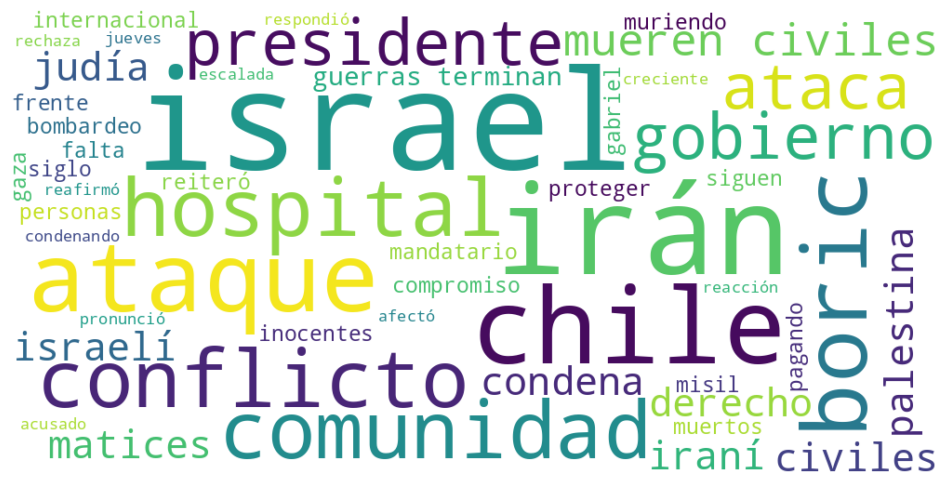

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [ ]:
#NUBE DE PALABRAS EL MOSTRADOR

wordcloud = WordCloud(width=1000, height=500, min_font_size=10, max_font_size=150, max_words=50,
                      background_color="white", stopwords = mis_stopw ).generate( texto )


# Display imagen:
plt.figure(figsize=(12, 8) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Para guardar imagen
wordcloud.to_file("wordcloud_elmostrador.png")
plt.savefig("wordcloud_elmostrador.png")
files.download("wordcloud_elmostrador.png")

In [ ]:
# Para que quedara bien en la lámina necesitaba la wordcloud de una escala de colores de este rojo #CB3D00
# Fragmento de código generado por ChatGPT (OpenAI) en respuesta a un prompt específico:
# "quiero que mi nube esté de color #CB3D00, algunas más oscuras otras más claras..." (5 de julio de 2025).

import random
def variar_luminosidad(hex_color):
    # Convertir HEX a RGB
    hex_color = hex_color.lstrip('#')
    r, g, b = [int(hex_color[i:i+2], 16) for i in (0, 2, 4)]

    # Factor de variación (0.6 a 1.2 → más oscuro o más claro)
    factor = random.uniform(0.6, 1.2)

    # Ajustar brillo manteniendo el color base
    r = min(255, int(r * factor))
    g = min(255, int(g * factor))
    b = min(255, int(b * factor))

    return f"rgb({r}, {g}, {b})"

def color_func(*args, **kwargs):
    return variar_luminosidad("#CB3D00")



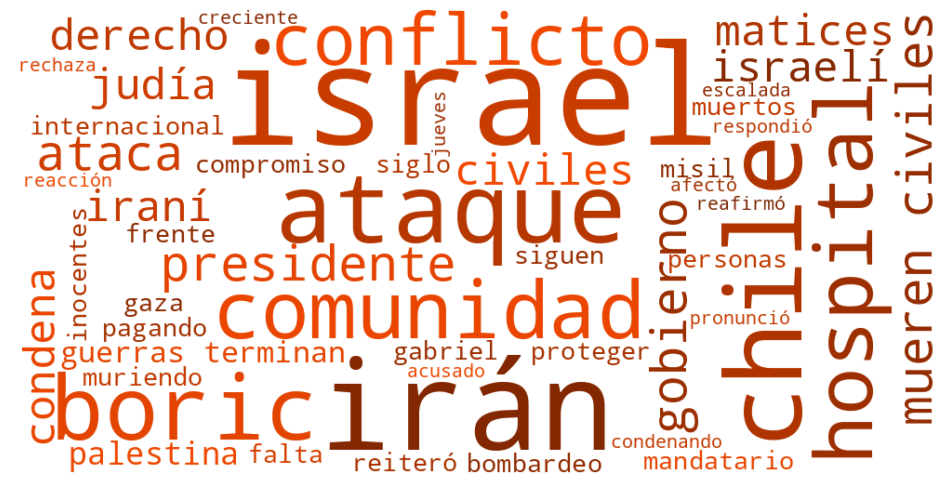

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud2 = WordCloud(width=1000, height=500, min_font_size=10, max_font_size=150,
                       max_words=50, background_color="white", stopwords=mis_stopw,
                       color_func=color_func).generate(texto)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

# EMOL: SCRAPPING Y WORDCLOUD


In [ ]:
# SCRAPPING: REQUEST

req2 = requests.get('https://www.emol.com/noticias/Nacional/2025/06/21/1169986/boric-condena-ataque-eeuu-iran.html')
larespuesta = req2.status_code

larespuesta

200

In [ ]:
# SCRAPPING: VER HTML

soup2 = BeautifulSoup(req2.content.decode("utf-8"),  "html.parser")

soup2


<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">

<html dir="ltr" lang="es-LA" xml:lang="es" xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/">
<head prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb# article: http://ogp.me/ns/article#">
<title>Presidente Boric condena ataque de EE.UU. sobre Irán: "Tener poder no autoriza a utilizarlo vulnerando reglas"</title>
<meta charset="utf-8"/>
<meta content="text/html;" http-equiv="Content-Type"/>
<meta content="width=device-width, initial-scale=1, maximum-scale=1" name="viewport"/>
<meta content="VZ0JZZVEK5tQwbghGEcxKoye0PA" name="alexaVerifyID"/>
<meta content="IE=Edge,chrome=1" http-equiv="X-UA-Compatible"/>
<meta content='Presidente Boric condena ataque de EE.UU. sobre Irán: "Tener poder no autoriza a utilizarlo vulnerando reglas"' name="title"/>
<meta content='Presidente Boric condena

In [ ]:
# SCRAPPING: OBTENER TÍTULO

art_tit2 = soup2.find("h1").text.strip()

art_tit2

'Presidente Boric condena ataque de EE.UU. sobre Irán: "Tener poder no autoriza a utilizarlo vulnerando reglas"'

In [ ]:
# SCRAPPING: OBTENER BAJADA
art_bajada2 = soup2.find("meta", attrs={"name": "description"})
art_bajada2_texto = art_bajada2.get("content").strip()

art_bajada2_texto

'El Jefe de Estado afirmó que "defenderemos el respeto al derecho internacional humanitario en todas las instancias".'

In [ ]:
# SCRAPPING: OBTENER CONTENIDO
# emol trae el cuerpo de su noticia de otra parte con js, así que como está encriptado lo extraeré manualmente

art_contenido2 = 'El Presidente de la República, Gabriel Boric, condenó el ataque que Estados Unidos lanzó esta noche contra objetivos nucleares en Irán, bombardeo que fue anunciado por el mandatario del país norteamericano, Donald Trump. "Estados Unidos anuncia que acaba de bombardear centrales nucleares en Irán. Atacar centrales nucleares está prohibido por el derecho internacional. Chile condena este ataque de EE.UU.", señaló Boric a través de su cuenta de X. No obstante, el ataque se dirigió contra instalaciones nucleares, no centrales como señaló el Jefe de Estado. "Defenderemos el respeto al derecho internacional humanitario en todas las instancias. Tener poder no autoriza a utilizarlo vulnerando las reglas que como humanidad nos hemos dado. Aunque seas Estados Unidos", complementó. Trump informó esta jornada que Estados Unidos que la operación "se completó con gran éxito" y que afectó a las plantas nucleares de Fordow, Natanz e Isfahán. "Todos los aviones se encuentran ahora fuera del espacio aéreo iraní. Se lanzó una carga completa de bombas sobre la instalación principal, Fordow", afirmó Trump. Puntualizó que "todos los aviones regresan sanos y salvos a casa. Felicitaciones a nuestros grandes guerreros estadounidenses. Ningún otro ejército en el mundo podría haber hecho esto. ¡Ahora es la hora de la paz!".'



In [ ]:
## - - - - - - - - - - - -
## SEPARAR PALABRAS TITULO
## - - - - - - - - - - - -

# lower poner palabras en bajas
art_tit2_low   = art_tit2.strip().lower()

# Se separan todas las palabras y guardar en una lista
art_tit_split_emol = art_tit2_low.split() # Split corta
art_tit_split_emol

['presidente',
 'boric',
 'condena',
 'ataque',
 'de',
 'ee.uu.',
 'sobre',
 'irán:',
 '"tener',
 'poder',
 'no',
 'autoriza',
 'a',
 'utilizarlo',
 'vulnerando',
 'reglas"']

In [ ]:
## - - - - - - - - - - - -
## SEPARAR PALABRAS BAJADA
## - - - - - - - - - - - -

# lower poner palabras en bajas
art_bajada2_low = art_bajada2.get("content").strip().lower()

# Se separan todas las palabras y guardar en una lista
art_bajada_split_emol= art_bajada2_low.split() # Split corta
art_bajada_split_emol

['el',
 'jefe',
 'de',
 'estado',
 'afirmó',
 'que',
 '"defenderemos',
 'el',
 'respeto',
 'al',
 'derecho',
 'internacional',
 'humanitario',
 'en',
 'todas',
 'las',
 'instancias".']

In [ ]:
## - - - - - - - - - - - -
## SEPARAR PALABRAS CONTENIDO
## - - - - - - - - - - - -

# lower poner palabras en bajas
art_contenido2_low = art_contenido2.strip().lower()

# Se separan todas las palabras y guardar en una lista
art_contenido_split_emol= art_contenido2_low.split() # Split corta
art_contenido_split_emol

['el',
 'presidente',
 'de',
 'la',
 'república,',
 'gabriel',
 'boric,',
 'condenó',
 'el',
 'ataque',
 'que',
 'estados',
 'unidos',
 'lanzó',
 'esta',
 'noche',
 'contra',
 'objetivos',
 'nucleares',
 'en',
 'irán,',
 'bombardeo',
 'que',
 'fue',
 'anunciado',
 'por',
 'el',
 'mandatario',
 'del',
 'país',
 'norteamericano,',
 'donald',
 'trump.',
 '"estados',
 'unidos',
 'anuncia',
 'que',
 'acaba',
 'de',
 'bombardear',
 'centrales',
 'nucleares',
 'en',
 'irán.',
 'atacar',
 'centrales',
 'nucleares',
 'está',
 'prohibido',
 'por',
 'el',
 'derecho',
 'internacional.',
 'chile',
 'condena',
 'este',
 'ataque',
 'de',
 'ee.uu.",',
 'señaló',
 'boric',
 'a',
 'través',
 'de',
 'su',
 'cuenta',
 'de',
 'x.',
 'no',
 'obstante,',
 'el',
 'ataque',
 'se',
 'dirigió',
 'contra',
 'instalaciones',
 'nucleares,',
 'no',
 'centrales',
 'como',
 'señaló',
 'el',
 'jefe',
 'de',
 'estado.',
 '"defenderemos',
 'el',
 'respeto',
 'al',
 'derecho',
 'internacional',
 'humanitario',
 'en',
 'to

In [ ]:
# STOPWORDS

otras_stopw_emol = ['"tener', '"defenderemos', '"se', '"todos', '¡ahora', 'paz!".']
reinsercion_emol = ['tener', 'defenderemos', 'todos', 'ahora', 'paz' ]

stopw_oficiales_emol = lista_stopwords + otras_stopw_emol
stopw_oficiales_emol

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '_',
 'a',
 'actualmente',
 'acuerdo',
 'adelante',
 'ademas',
 'además',
 'adrede',
 'afirmó',
 'agregó',
 'ahi',
 'ahora',
 'ahí',
 'al',
 'algo',
 'alguna',
 'algunas',
 'alguno',
 'algunos',
 'algún',
 'alli',
 'allí',
 'alrededor',
 'ambos',
 'ampleamos',
 'antano',
 'antaño',
 'ante',
 'anterior',
 'antes',
 'apenas',
 'aproximadamente',
 'aquel',
 'aquella',
 'aquellas',
 'aquello',
 'aquellos',
 'aqui',
 'aquél',
 'aquélla',
 'aquéllas',
 'aquéllos',
 'aquí',
 'arriba',
 'arribaabajo',
 'aseguró',
 'asi',
 'así',
 'atras',
 'aun',
 'aunque',
 'ayer',
 'añadió',
 'aún',
 'b',
 'bajo',
 'bastante',
 'bien',
 'breve',
 'buen',
 'buena',
 'buenas',
 'bueno',
 'buenos',
 'c',
 'cada',
 'casi',
 'cerca',
 'cierta',
 'ciertas',
 'cierto',
 'ciertos',
 'cinco',
 'claro',
 'comentó',
 'como',
 'con',
 'conmigo',
 'conocer',
 'conseguimos',
 'conseguir',
 'considera',
 'consideró',
 'consigo',
 'consigue',
 'consiguen',
 'consi

In [ ]:
todas_palabras_emol = art_tit_split_emol + art_bajada_split_emol + art_contenido_split_emol + reinsercion_emol

In [ ]:
palabras_sin_stopwords_emol = [palabra for palabra in todas_palabras_emol if palabra.lower() not in stopw_oficiales_emol]
palabras_sin_stopwords_emol

['presidente',
 'boric',
 'condena',
 'ataque',
 'ee.uu.',
 'irán:',
 'autoriza',
 'utilizarlo',
 'vulnerando',
 'reglas"',
 'jefe',
 'respeto',
 'derecho',
 'internacional',
 'humanitario',
 'instancias".',
 'presidente',
 'república,',
 'gabriel',
 'boric,',
 'condenó',
 'ataque',
 'unidos',
 'lanzó',
 'noche',
 'objetivos',
 'nucleares',
 'irán,',
 'bombardeo',
 'anunciado',
 'mandatario',
 'país',
 'norteamericano,',
 'donald',
 'trump.',
 '"estados',
 'unidos',
 'anuncia',
 'acaba',
 'bombardear',
 'centrales',
 'nucleares',
 'irán.',
 'atacar',
 'centrales',
 'nucleares',
 'prohibido',
 'derecho',
 'internacional.',
 'chile',
 'condena',
 'ataque',
 'ee.uu.",',
 'boric',
 'x.',
 'obstante,',
 'ataque',
 'dirigió',
 'instalaciones',
 'nucleares,',
 'centrales',
 'jefe',
 'estado.',
 'respeto',
 'derecho',
 'internacional',
 'humanitario',
 'instancias.',
 'autoriza',
 'utilizarlo',
 'vulnerando',
 'reglas',
 'humanidad',
 'dado.',
 'unidos",',
 'complementó.',
 'trump',
 'jornada'

In [ ]:
texto2 = ' '.join(palabras_sin_stopwords_emol)

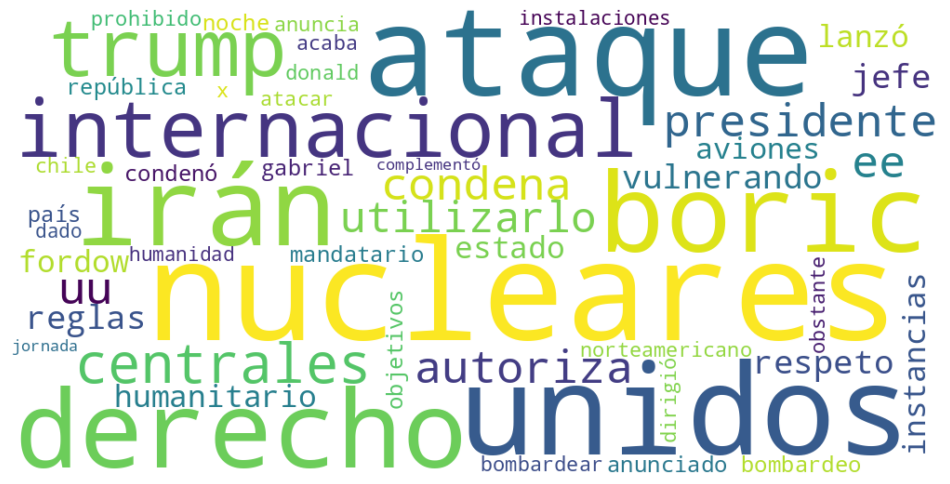

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [ ]:
#NUBE DE PALABRAS EMOL

wordcloud2 = WordCloud(width=1000, height=500, min_font_size=10, max_font_size=150, max_words=50,
                      background_color="white", stopwords = mis_stopw ).generate( texto2 )


# Display imagen:
plt.figure(figsize=(12, 8) )
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

# Para guardar imagen
wordcloud.to_file("wordcloud_emol.png")
plt.savefig("wordcloud_emol.png")
files.download("wordcloud_emol.png")

In [ ]:
# para que quedara bien en la infografía necesitaba la wordcloud de una escala de colores de este violeta #6342E5
# fragmento de código adaptado del utilizado para la wordcloud de el mostrador

import random
def variar_luminosidad(hex_color):
    # Convertir HEX a RGB
    hex_color = hex_color.lstrip('#')
    r, g, b = [int(hex_color[i:i+2], 16) for i in (0, 2, 4)]

    # Factor de variación (0.6 a 1.2 → más oscuro o más claro)
    factor = random.uniform(0.6, 1.2)

    # Ajustar brillo manteniendo el color base
    r = min(255, int(r * factor))
    g = min(255, int(g * factor))
    b = min(255, int(b * factor))

    return f"rgb({r}, {g}, {b})"

def color_func(*args, **kwargs):
    return variar_luminosidad("#6342E5")


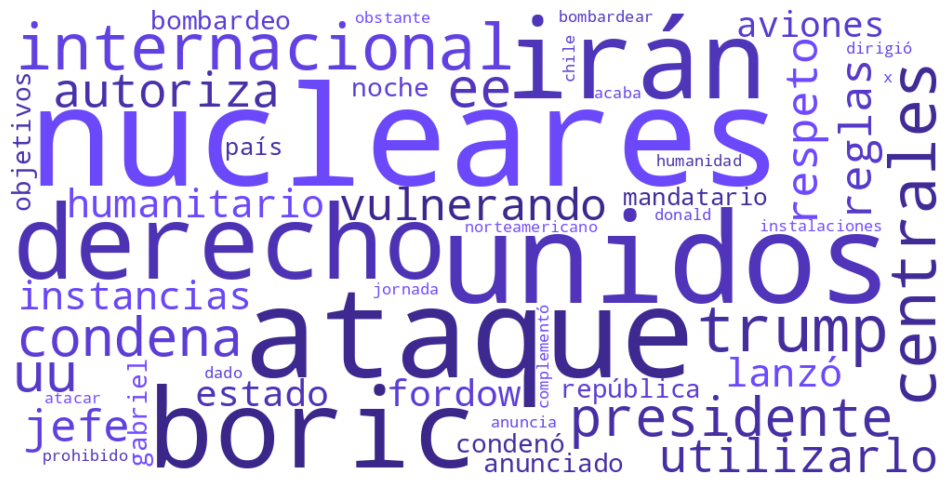

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud2 = WordCloud(width=1000, height=500, min_font_size=10, max_font_size=150,
                       max_words=50, background_color="white", stopwords=mis_stopw,
                       color_func=color_func).generate(texto2)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

# REDES DE STAKEHOLDERS

In [ ]:
import seaborn as sns
import numpy as np
import networkx as nx
from google.colab import files

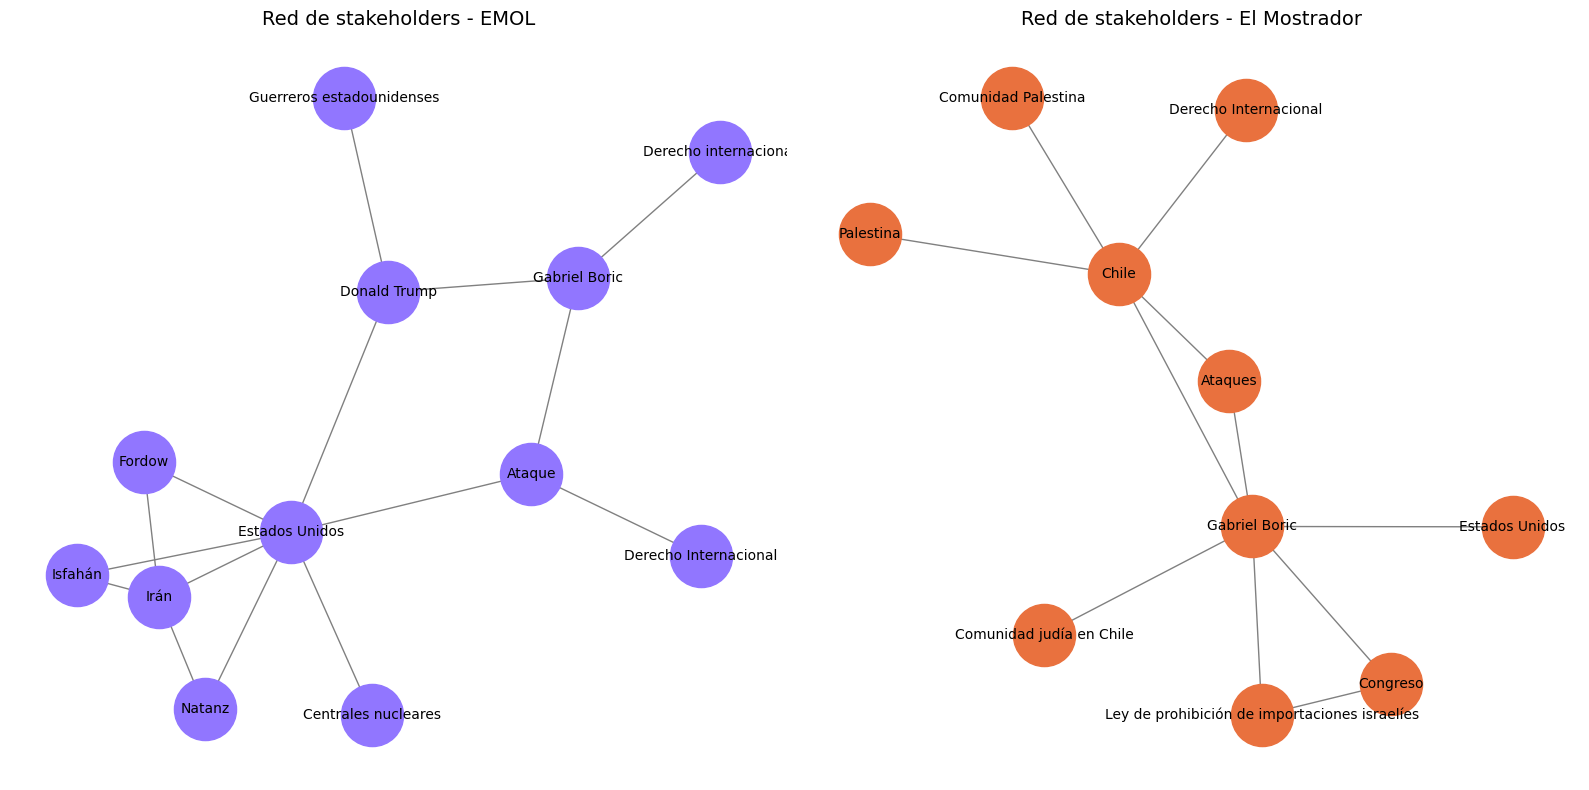

In [ ]:
# los nodos fueron escogidos manualmente, sin código ni algoritmos
# todos los nodos son conceptos/actores mencionados EXPLÍCITAMENTE en la noticia. Si se mencionan "guerreros estadounidenses", en lugar de soldados por ejemplo, es porque en la noticia se mencionó así.
# cada arista se representó una única vez
# cada arista representa una conexión significativa (ej condena, pertenencia, oposición, etc)

edges_mostrador = [
    ("Gabriel Boric", "Ataques"),
    ("Comunidad judía en Chile", "Gabriel Boric"),
    ("Gabriel Boric", "Chile"),
    ("Chile", "Ataques"),
    ("Chile", "Derecho Internacional"),
    ("Chile", "Comunidad Palestina"),
    ("Gabriel Boric", "Congreso"),
    ("Gabriel Boric", "Ley de prohibición de importaciones israelíes"),
    ("Congreso", "Ley de prohibición de importaciones israelíes"),
    ("Chile", "Palestina"),
    ("Estados Unidos", "Gabriel Boric"),
]


edges_emol = [
    ("Gabriel Boric", "Ataque"),
    ("Ataque", "Estados Unidos"),
    ("Estados Unidos", "Irán"),
    ("Gabriel Boric", "Derecho internacional"),
    ("Estados Unidos", "Donald Trump"),
    ("Estados Unidos", "Centrales nucleares"),
    ("Ataque", "Derecho Internacional"),
    ("Guerreros estadounidenses", "Donald Trump"),
    ("Gabriel Boric", "Donald Trump"),
    ("Estados Unidos", "Fordow"),
    ("Estados Unidos", "Natanz"),
    ("Estados Unidos", "Isfahán"),
    ("Irán", "Fordow"),
    ("Irán", "Natanz"),
    ("Irán", "Isfahán")
]


# Crear los grafos
G_emol = nx.Graph()
G_emol.add_edges_from(edges_emol)

G_mostrador = nx.Graph()
G_mostrador.add_edges_from(edges_mostrador)

# Dibujar los dos grafos lado a lado
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# EL MOSTRADOR
pos_mostrador = nx.spring_layout(G_mostrador, seed=42)
nx.draw(G_mostrador, pos_mostrador, with_labels=True, node_color='#E9713E',
        node_size=2000, font_size=10, edge_color='gray', ax=axes[1])
axes[1].set_title("Red de stakeholders - El Mostrador", fontsize=14)

# EMOL
pos_emol = nx.spring_layout(G_emol, seed=42)
nx.draw(G_emol, pos_emol, with_labels=True, node_color='#9176FF',
        node_size=2000, font_size=10, edge_color='gray', ax=axes[0])
axes[0].set_title("Red de stakeholders - EMOL", fontsize=14)

plt.tight_layout()
plt.show()





# GRÁFICOS DE BARRA DE CATEGORÍAS SEMÁNTICAS

In [ ]:
# La clasificación de las palabras en categorías se hará de manera manual, tomando palabras que nosotras no consideramos stopw.
# Este tipo de gráfico nos sirve mucho para visualizar más o menos el enfoque editorial o ideológico de cada medio, sus prioridades en el qué y cómo comunicar
# No usaremos el listado de stowp que entregaron en csv y las sacaremos manualmente porque para efectos de clasificacion, al leer todas las palabras en un contexto puede que ya no sean simples stopwords. Por ej la palabra 'tener' parecería una stopword pero en el contexto del titular pasa a ser legalidad o incluso de ética

#CLASIFICACION SEMANTICA TITULO EMOL
diplomacia_emol_tit = ['presidente', 'boric', 'EE.UU.', 'irán']
etica_emol_tit = ['condena', 'tener', 'poder', 'autoriza', 'utilizarlo', 'vulnerando']
accion_belica_emol_tit = ['ataque']
legalidad_emol_tit = ['reglas']

#CLASIFICACION SEMANTICA BAJADA EMOL
diplomacia_emol_baj = ['jefe', 'estado', 'afirmó']
etica_emol_baj = []
accion_belica_emol_baj = []
legalidad_emol_baj = ['defenderemos', 'respeto', 'derecho', 'internacional', 'humanitario', 'instancias']

#CLASIFICACION SEMANTICA CONTENIDO EMOL PARRAFO 1
diplomacia_emol_cont1 = ['presidente', 'república', 'gabriel boric', 'estados unidos', 'irán', 'anunciado', 'mandatario', 'país norteamericano', 'donald trump']
etica_emol_cont1 = ['condenó']
accion_belica_emol_cont1 = ['ataque', 'lanzó', 'objetivos nucleares', 'bombardeo']
legalidad_emol_cont1 = []

#CLASIFICACION SEMANTICA CONTENIDO EMOL PARRAFO 2
diplomacia_emol_cont2 = ['estados unidos', 'anuncia', 'irán', 'chile', 'ee.uu.', 'señaló', 'boric', 'cuenta de x']
etica_emol_cont2 = ['condena']
accion_belica_emol_cont2 = ['bombardear', 'centrales nucleares', 'atacar', 'ataque']
legalidad_emol_cont2 = ['prohibido', 'derecho internacional']

#CLASIFICACION SEMANTICA CONTENIDO EMOL PARRAFOS 3 Y 4
diplomacia_emol_cont3 = ['señaló', 'jefe de estado', 'estados unidos', 'complementó']
etica_emol_cont3 = ['poder', 'autoriza', 'utilizarlo', 'vulnerando', 'humanidad']
accion_belica_emol_cont3 = ['ataque', 'dirigió', 'instalaciones nucleares', 'centrales']
legalidad_emol_cont3 = ['defenderemos', 'respeto', 'derecho internacional', 'humanitario', 'instancias', 'reglas']

#CLASIFICACION SEMANTICA CONTENIDO EMOL PARRAFOS 5, 6 y 7
diplomacia_emol_cont4 = ['trump', 'estados unidos', 'fordow', 'natanz', 'isfahán']
etica_emol_cont4 = ['guerreros estadounidenses', 'paz']
accion_belica_emol_cont4 = ['operación', 'éxito', 'plantas nucleares', 'aviones', 'espaceo aéreo iraní', 'carga', 'bombas', 'instalación principal', 'ejército', 'regresan sanos y salvos']
legalidad_emol_cont4 = []

In [ ]:
diplomacia_emol = diplomacia_emol_tit + diplomacia_emol_baj + diplomacia_emol_cont1 + diplomacia_emol_cont2 + diplomacia_emol_cont3 + diplomacia_emol_cont4
etica_emol = etica_emol_tit + etica_emol_baj + etica_emol_cont1 + etica_emol_cont2 + etica_emol_cont3 + etica_emol_cont4
accion_belica_emol = accion_belica_emol_tit + accion_belica_emol_baj + accion_belica_emol_cont1 + accion_belica_emol_cont2 + accion_belica_emol_cont3 + accion_belica_emol_cont4
legalidad_emol = legalidad_emol_tit + legalidad_emol_baj + legalidad_emol_cont1 + legalidad_emol_cont2 + legalidad_emol_cont3 + legalidad_emol_cont4

print (len(diplomacia_emol))
print (len(etica_emol))
print (len(accion_belica_emol))
print (len(legalidad_emol))


33
15
23
15


In [ ]:
#CLASIFICACION SEMANTICA TITULO EL MOSTRADOR
diplomacia_elmost_tit = ['boric', 'israel', 'irán']
etica_elmost_tit = ['inocentes', 'condena', 'matices']
accion_belica_elmost_tit = ['guerras', 'pagando', 'ataques']
legalidad_elmost_tit = []

#CLASIFICACION SEMANTICA BAJADA EL MOSTRADOR
diplomacia_elmost_baj = ['comunidad judía', 'chile', 'acusado', 'iraní', 'israel', 'mandatario', 'respondió', 'reafirmó']
etica_elmost_baj = ['falta', 'reacción', 'hospital', 'rechaza']
accion_belica_elmost_baj = ['bombardeo', 'afectó', 'ataques', 'conflicto', 'muertos']
legalidad_elmost_baj = ['compromiso', 'derecho internacional']

#CLASIFICACION SEMANTICA CONTENIDO EL MOSTRADOR P1
diplomacia_elmost_cont1 = ['presidente', 'boric', 'pronunció', 'irán', 'israel', 'condenando', 'países', 'mandatario']
etica_elmost_cont1 = ['terminan', 'pagando', 'inocentes']
accion_belica_elmost_cont1 = ['escalada', 'conflicto' 'ataques', 'guerras']
legalidad_elmost_cont1 = []

#CLASIFICACION SEMANTICA CONTENIDO EL MOSTRADOR P2
diplomacia_elmost_cont2 = ['mandatario', 'expresó', 'israel', 'irán', 'irán', 'israel', 'gaza', 'afirmó', 'chile', 'condena', 'reiteró', 'país']
etica_elmost_cont2 = ['mueren', 'civiles', 'mueren', 'civiles', 'muriendo', 'civiles', 'matices']
accion_belica_elmost_cont2 = ['ataca', 'ataca', 'ataques', 'curso']
legalidad_elmost_cont2 = ['compromiso', 'defensa', 'derecho internacional', 'derechos humanos', 'contextos', 'instancias']

#CLASIFICACION SEMANTICA CONTENIDO EL MOSTRADOR P3
diplomacia_elmost_cont3 = ['declaración', 'criticara', 'condena', 'presidente', 'iraní', 'israelí']
etica_elmost_cont3 = ['falta', 'explícita', 'hospital', 'afectado', 'comunidad judía en chile',]
accion_belica_elmost_cont3 = ['ataque']
legalidad_elmost_cont3 = []

#CLASIFICACION SEMANTICA CONTENIDO EL MOSTRADOR P4 esta es la parte del tweet de la comjudíachile
diplomacia_elmost_cont4 = ['comunidad judía de chile', 'acciones', 'gobierno', 'chilenos', 'israel', 'iraní', 'israel']
etica_elmost_cont4 = ['proteger', 'silencio', 'ensordecedor', 'hospital', 'centro',  'asistencial']
accion_belica_elmost_cont4 = ['misil', 'golpeó', 'misiles']
legalidad_elmost_cont4 = []

#CLASIFICACION SEMANTICA CONTENIDO EL MOSTRADOR P5
diplomacia_elmost_cont5 = ['chile', 'comunidad palestina', 'migración', 'palestinos', 'intervención israelí']
etica_elmost_cont5 = ['refugio', 'escaparon']
accion_belica_elmost_cont5 = []
legalidad_elmost_cont5 = ['dominación otomana']

#CLASIFICACION SEMANTICA CONTENIDO EL MOSTRADOR P6
diplomacia_elmost_cont6 = ['presidente boric']
etica_elmost_cont6 = ['defensor', 'causa palestina']
accion_belica_elmost_cont6 = []
legalidad_elmost_cont6 = ['apruebe', 'ley', 'urgencia', 'prohibir', 'importacion', 'colonias israelíes']

#CLASIFICACION SEMANTICA CONTENIDO EL MOSTRADOR P7
diplomacia_elmost_cont7 = ['jefe de estado', 'criticado', 'primer ministro netanyahu', 'respaldó', 'propuesta', 'gobierno de españa', 'gobierno de israel']
etica_elmost_cont7 = []
accion_belica_elmost_cont7 = ['ofensiva israelí']
legalidad_elmost_cont7 = ['embargo de armas', 'decretar']

#CLASIFICACION SEMANTICA CONTENIDO EL MOSTRADOR P8
diplomacia_elmost_cont8 = ['chile', 'reconoció', 'palestina', 'estado', 'gobierno', 'sebastián piñera']
etica_elmost_cont8 = ['libre']
accion_belica_elmost_cont8 = []
legalidad_elmost_cont8 = ['independiente', 'soberano']

#CLASIFICACION SEMANTICA CONTENIDO EL MOSTRADOR P9
diplomacia_elmost_cont9 = ['irán']
etica_elmost_cont9 = ['personas desplazadas', 'abandonar hogares']
accion_belica_elmost_cont9 = ['conflicto', 'enfrentamientos', 'muertos', 'bombardeos', 'efectos', 'bombardeos']
legalidad_elmost_cont9 = ['acceso a internet', 'grabación de imágenes']

#CLASIFICACION SEMANTICA CONTENIDO EL MOSTRADOR P10
diplomacia_elmost_cont10 = ['estados unidos', 'presidente boric', 'reiteró']
etica_elmost_cont10 = ['llamado', 'paz', 'proteger', 'poblaciones', 'civiles', 'víctimas']
accion_belica_elmost_cont10 = ['involucramiento', 'hostilidades', 'continúan', 'amenazas', 'tensión', 'conflictos armados']
legalidad_elmost_cont10 = []

In [ ]:
diplomacia_elmost = diplomacia_elmost_tit + diplomacia_elmost_baj + diplomacia_elmost_cont1 + diplomacia_elmost_cont2 + diplomacia_elmost_cont3 + diplomacia_elmost_cont4 + diplomacia_elmost_cont5 + diplomacia_elmost_cont6 + diplomacia_elmost_cont7 + diplomacia_elmost_cont8 + diplomacia_elmost_cont9 + diplomacia_elmost_cont10
etica_elmost = etica_elmost_tit + etica_elmost_baj + etica_elmost_cont1 + etica_elmost_cont2 + etica_elmost_cont3 + etica_elmost_cont4 + etica_elmost_cont5 + etica_elmost_cont6 + etica_elmost_cont7 + etica_elmost_cont8 + etica_elmost_cont9 + etica_elmost_cont10
accion_belica_elmost = accion_belica_elmost_tit + accion_belica_elmost_baj + accion_belica_elmost_cont1 + accion_belica_elmost_cont2 + accion_belica_elmost_cont3 + accion_belica_elmost_cont4 + accion_belica_elmost_cont5 + accion_belica_elmost_cont6 + accion_belica_elmost_cont7 + accion_belica_elmost_cont8 + accion_belica_elmost_cont9 + accion_belica_elmost_cont10
legalidad_elmost = legalidad_elmost_tit + legalidad_elmost_baj + legalidad_elmost_cont1 + legalidad_elmost_cont2 + legalidad_elmost_cont3 + legalidad_elmost_cont4 + legalidad_elmost_cont5 + legalidad_elmost_cont6 + legalidad_elmost_cont7 + legalidad_elmost_cont8 + legalidad_elmost_cont9 + legalidad_elmost_cont10

print (len(diplomacia_elmost))
print (len(etica_elmost))
print (len(accion_belica_elmost))
print (len(legalidad_elmost))

71
40
32
21


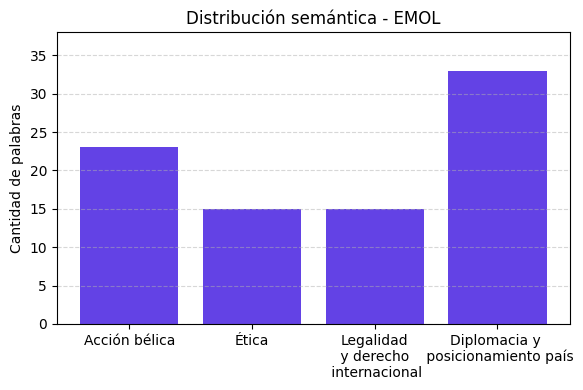

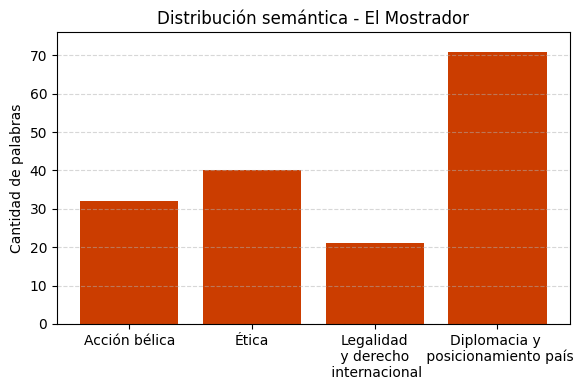

In [ ]:
import matplotlib.pyplot as plt

categorias = ['Acción bélica', 'Ética', 'Legalidad\n y derecho \n internacional', 'Diplomacia y \n posicionamiento país']

# EMOL
emol_counts = [len(accion_belica_emol), len(etica_emol), len(legalidad_emol), len(diplomacia_emol)]
plt.figure(figsize=(6, 4))
plt.bar(categorias, emol_counts, color='#6342E5')
plt.title('Distribución semántica - EMOL')
plt.ylabel('Cantidad de palabras')
plt.ylim(0, max(emol_counts) + 5)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# EL MOSTRADOR
elmost_counts = [len(accion_belica_elmost), len(etica_elmost), len(legalidad_elmost), len(diplomacia_elmost)]
plt.figure(figsize=(6, 4))
plt.bar(categorias, elmost_counts, color='#CB3D00')
plt.title('Distribución semántica - El Mostrador')
plt.ylabel('Cantidad de palabras')
plt.ylim(0, max(elmost_counts) + 5)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()